# Homework 1:  
Data Cleaning, Describing, and Visualization

By Spencer Wise

## Description:
In this data science project, I will read in three different kinds of datasets (CSV, SQL, JSON from API). 

After I have read in these three datasets, I will:
1. Clean the data (handle missing data, handle outliers, etc.)
2. Describe the data with tables, statistics, and summaries. 
3. Visualize the data. 

### Import Libraries

In [2]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import sqlite3
import json
from scipy import stats
from urllib.request import Request, urlopen
from pandas.io.json import json_normalize

#%matplotlib inline shows plots in Jupyter Notebook browser
%matplotlib inline

### Import Dataset 1

When I was a kid, I was obsessed with Pokemon. I used to bring my binder filled with Pokemon cards to school every day to trade with my friends. Although I collected Pokemon cards, played all the Pokemon gameboy games, and watched the Pokemon television show, there's still a lot about Pokemon that I don't know. My goal is to answer a few lifelong questions by analyzing this Pokemon data.

The first step is to import the Pokemon dataset.

In [3]:
#Reading in the Pokemon dataset downloaded from kaggle
pokemon_data = pd.read_csv(r"C:\Users\Spencer\Dropbox\School\Fall 2018\Machine Learning\Projects\Homework_1\Pokemon.csv", encoding="latin1")

### Summarize Data

Now that the data has been read into Python, we will want to preview the dataset.

In [4]:
#Preview data
pokemon_data.info()
pokemon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data preview, I can see: 13 variables, 800 observations, which features are missing data, and how variables are encoded.

In [5]:
#Describe data
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From describing the data, I learn the basic information of min and max values, mean, and standard deviation. 

### Cleaning Data

Now I will print all of the columns so I can see exactly what information is included in the dataset.

In [6]:
#Printing all of the columns
print(pokemon_data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


I am going to drop the "#" column because it isn't needed in the analysis of this dataset.

In [7]:
#Dropping the "#" column
pokemon_data.drop(['#'], inplace=True, axis=1)

Now I am going to rename a couple of the columns with unnecessary spaces in their names to make them easier to deal with later.

In [8]:
#Renaming some of the columns
pokemon_data.rename(columns={'Type 1': 'Type_1', 'Type 2': "Type_2"}, inplace=True)

### Visualizing Data

Now that the data is clean, I will look for correlation between the variables.

In [9]:
#Look for correlation in the data
pokemon_data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


We can quickly see that a good amount of the data is correlated. One thing to notice is that "generation" does not have a high correlation with any of the other variables which means that pokemon didn't get meaningfully stronger or weaker as generations progressed. 

Now I am going to use a barplot to compare two categories: Type 1 of pokemon, and total stats (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP) to see which type of pokemon is the strongest. 

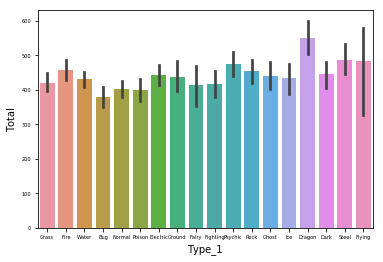

In [34]:
#Show barplot to compare two categories Pokemon type and total stats
def barplot(x_axis, y_axis, tick_size):
    sns.barplot(x_axis, y_axis).tick_params(labelsize=tick_size)
barplot(pokemon_data.Type_1, pokemon_data.Total, 5)

From the barplot, we can see that the strongest type of pokemon based on total stats is the Dragon type. The weakest pokemon type is Bug type.

My next question is around legendary pokemon. Are legendary pokemon stronger than non-legendary pokemon? My gut says yes, but we can find out with a barplot that shows legendary pokemon's total stats vs. non-legendary pokemon's total stats. 

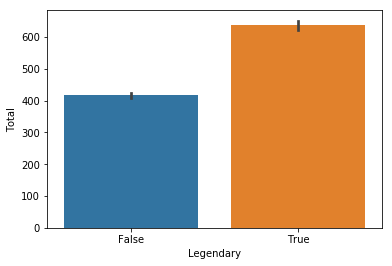

In [11]:
barplot(pokemon_data.Legendary, pokemon_data.Total, 10)

We can see from the above barplot that legendary pokemon are, indeed, stronger than non-legendary pokemon based on total stats.

C:\Users\Spencer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


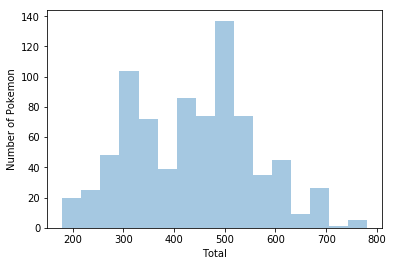

In [42]:
#Use Seaborn to create a histogram
def dist(data, kde):
    sns.distplot(data, kde=kde)
dist(pokemon_data.Total, False)    
#Create a function that gives a label to the y-axis
def y(label, font_size):
    plt.ylabel(label, fontsize=font_size)
y('Number of Pokemon', 10)

Another way of visualizing this data is by using a histogram to plot the distribution. In the above graph, we see that total stats are bimodally distributed with two peaks around 300 and 500. 

### Import Dataset 2

Growing up in the Bay Area, CA, I've followed the tech industry for the majority of the past decade. In my opinion, one of the more interesting companies to emerge over the past 10 years is Lending Club, which is a peer to peer lending platform. I've always found it fascinating that a platform like this could exist and I'm curious what kind of people Lending Club caters to. 

In [99]:
#Reading in the Lending Club dataset downloaded from kaggle
conn  =  sqlite3.connect("C:/Users/Spencer/Dropbox/School/Fall 2018/Machine Learning/Projects/Homework_1/database.sqlite")

In [100]:
#Preview data
head_df = pd.read_sql_query("select * from loan limit 5;", conn)
head_df

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,None,None,None,None,None,None,None,None,None,None
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,None,None,None,None,None,None,None,None,None,None
2,2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,None,None,None,None,None,None,None,None,None,None
3,3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,...,None,None,None,None,None,None,None,None,None,None
4,4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,...,None,None,None,None,None,None,None,None,None,None


This is a fairly large dataset with 75 variables and 887383	observations. To make it a little more manageable, I am only going to select 10 of the variables to include in our dataset.

In [101]:
#Querying only 10 of the most interesting variables and creating a new data frame
df_lite = pd.read_sql_query("""select loan_amnt, term, int_rate, funded_amnt, zip_code, addr_state, emp_title, emp_length, home_ownership, grade from loan
                    """, conn)

### Summarize Data

Now that I've excluded the unneccessary variables, I'd like to get a preview of the new dataset to get a better idea of what we're dealing with. 

In [102]:
#Preview data
df_lite.info()
df_lite.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887383 entries, 0 to 887382
Data columns (total 10 columns):
loan_amnt         887382 non-null float64
term              887382 non-null object
int_rate          887382 non-null object
funded_amnt       887382 non-null float64
zip_code          887382 non-null object
addr_state        887382 non-null object
emp_title         835925 non-null object
emp_length        887382 non-null object
home_ownership    887382 non-null object
grade             887382 non-null object
dtypes: float64(2), object(8)
memory usage: 67.7+ MB


,loan_amnt,funded_amnt
count,887382.000000,887382.000000
mean,14755.280082,14741.893147
std,8435.456408,8429.898507
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,13000.000000,13000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


### Cleaning Data

One issue that I'm seeing from this preview is the fact that "int_rate" and "term" are strings. We will be able to do a lot more with them by converting them into numeric data types.

In [103]:
#Convert interest rate and term from string to float type
def convert(df,v,remove,t,d):
    df[v] = df[v].str.rstrip(remove).astype(t) / d
convert(df_lite, 'int_rate','%', 'float', 100.0) 
convert(df_lite, 'term', ' months', 'float', 1)

Next, I will check my dataset for any missing data

In [104]:
#Check to see which variables have missing values
df_lite.isnull().any()

loan_amnt         True
term              True
int_rate          True
funded_amnt       True
zip_code          True
addr_state        True
emp_title         True
emp_length        True
home_ownership    True
grade             True
dtype: bool

By checking for missing values in my dataset, I have found that my dataset has missing data in all of my columns. The next step is to check and see if these missing values are random or non-random.

But first, I am going to see how many missing values there are per column.

In [105]:
#Check for number of missing values per column
df_lite.isnull().sum()

loan_amnt             1
term                  1
int_rate              1
funded_amnt           1
zip_code              1
addr_state            1
emp_title         51458
emp_length            1
home_ownership        1
grade                 1
dtype: int64

The good news is that each column only has one missing value besides emp_title which has more than half of its values missing.

I am going to strip out the emp_title and emp_length to look at the missing data for the other variables to determine why it is missing. 

In [106]:
#New dataframe querying the dataset without emp_title and emp_length
df_noemp = pd.read_sql_query("""select loan_amnt, term, int_rate, funded_amnt, zip_code, addr_state, home_ownership, grade from loan
                    """, conn)
#Creating a new dataframe that is returning just the rows with missing data
null_data = df_noemp[df_noemp.isnull().any(axis=1)]
null_data

,loan_amnt,term,int_rate,funded_amnt,zip_code,addr_state,home_ownership,grade
39786,NaN,None,None,NaN,None,None,None,None


After looking closer at the data, it seems like there is a random row with missing data for each column. I will drop this row. 

In [107]:
#Drop problematic row with null values
df_lite.drop(df_lite.index[39786], inplace=True)

I have also determined that emp_title is missing values because some of the loan holders are unemployed. There is no need to change these values. 

The last thing I will do is look for outliers in the dataset.

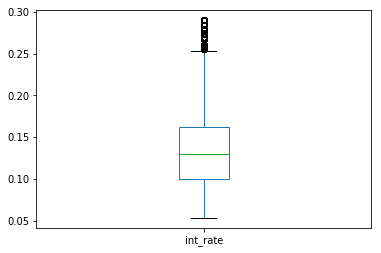

In [108]:
#Create box plot to look for outliers
def bp(df,v,kind):
    df[v].plot(kind=kind)
bp(df_lite, "int_rate", "box")

Here anything outside of the whiskers (1.5 times the inter quartile range, 25% - 75%) would be considered an outlier. 

As we can see, there may be a few outliers between the 25% and 30% range. We can take a closer look at these values.

In [109]:
#Query the max interest rate from the dataset
pd.read_sql_query("""select *, max(int_rate) from loan""", conn)

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,max(int_rate)
0,2807,68394899,73284687.0,30225.0,30225.0,30225.0,60 months,28.99%,959.22,G,...,77.5,3.0,3.0,4604.0,67.1,26900.0,0.0,0.0,4.0,28.99%


Although this interest rate is very high and may land outside of our 1.5x inter quartile range, the data looks valid. It also isn't so much of an outlier as to skew our results. As such, I will keep these values in the dataset. 

### Visualizing Data

Now that the data is clean and we have accounted for our outliers, we can visualize our data.

The first thing I will do is check the variables in the dataset for correlation. 

In [110]:
df_lite.corr()

,loan_amnt,term,int_rate,funded_amnt
loan_amnt,1.000000,0.411715,0.145020,0.999263
term,0.411715,1.000000,0.428060,0.410759
int_rate,0.145020,0.428060,1.000000,0.145157
funded_amnt,0.999263,0.410759,0.145157,1.000000


As expected, there is a strong correlation between our variables. This makes sense because they are all linked in some way. One interesting learning from this correlation table is that interest rate and loan amount aren't very highly correlated. I assume that interest rate must be determined more by the term of the loan and the grade of the loan. We can see that interest rate and term have a much higher correlation than interest rate and loan amount. 

The next thing I would like to see is how the loan grade and the interest rate are correlated. I'll use a trusty barplot to see the average interest rate for each loan grade. 

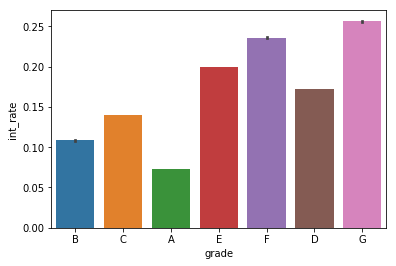

In [111]:
#Create barplot
barplot(df_lite.grade, df_lite.int_rate, 10)

As expected, the loan grade is highly correlated with the interest rate it receives. In the above graph we see that an A grade loan has an average interest rate around 7.5% and a G grade loan has an average interest rate above 25%. 

Lastly, I would like to look at the shape of the interest rate distribution. 

C:\Users\Spencer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


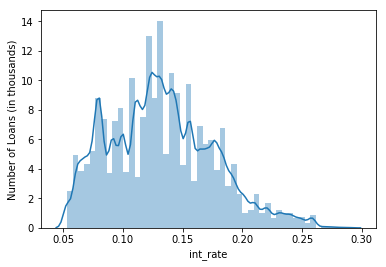

In [43]:
#Plot interest rate distribution shape
dist(df_lite.int_rate, True)
y("Number of Loans (in thousands)", 10)

The shape of the interest rate distrubution looks to be mostly normal. There appears to be another slight peak near 7.5% interest rates, but for the most part I think we could conclude interest rates are normally distributed.

### Import Dataset 3

This past summer, I interned at Citigroup in San Francisco in their technology investment banking group. I spent the majority of my time researching and analyzing and advising tech companies on mergers and acquisitions and raising money in the capital markets. For my last dataset, I decided to leverage the IEX API to analyze some tech company financial data. I then leveraged some code written by github user [himoacs](https://github.com/himoacs/iex_data/blob/master/iex_data.py) to retrieve the financial data from IEX. 

In [58]:
#Creating the class 'API'

class API(object):

    def __init__(self):
        self._end_point_prefix = r'https://api.iextrading.com/1.0/'

    def return_valid_securities(self, securities):
        suffix = r'ref-data/symbols'
        valid_securities = self._url_to_dataframe(self._end_point_prefix+suffix)['symbol']
        return [x for x in securities if x in set(valid_securities)]

    def _url_to_dataframe(self, url, nest=None):
        request = Request(url)
        response = urlopen(request)
        elevations = response.read()
        data = json.loads(elevations)

        if nest:
            data = json_normalize(data[nest])
        else:
            data = json_normalize(data)

        return pd.DataFrame(data)

    def get_financials(self, securities):
        securities = self.return_valid_securities(securities)
        final_df = pd.DataFrame({})

        # Get financials of each company and then append the results together
        if securities:
            for symbol in securities:
                suffix = r'stock/{symbol}/financials'.format(symbol=symbol)
                df = self._url_to_dataframe(self._end_point_prefix + suffix, 'financials')
                df['symbol'] = symbol
                final_df = final_df.append(df, ignore_index=True, sort=True)
            return final_df
        else:
            print('These stock(s) are invalid!')

In [59]:
#Creating a new dataframe with ten tickers of the companies I want to analyze
m  =  API()
ticker_list  = ['AAPL', 'GOOGL', 'AMZN', 'FB', 'MSFT', 'SNAP', 'TSLA', 'TWTR', 'NVDA', 'ROKU']
fin_df = pd.DataFrame(m.get_financials(ticker_list))

I used the above get_financials() function to retrieve the last four quarters worth of financial data for 10 tech companies that I researched / worked with directly this past summer. These companies were:
- Apple
- Google
- Amazon
- Facebook
- Microsoft
- Snap
- Tesla
- Twitter
- Nvidia
- Roku

In [61]:
#Examining Apple's data in the dataset
fin_df[fin_df['symbol']=='AAPL']

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,NaN,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,NaN,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,NaN,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,NaN,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000


As you can see above, the data is financial data that is reported in public companies' 10-K documents. All public companies must report these GAAP accounting metrics on a quarterly basis. These metrics include things like revenue, cost of revenue, net income, assets, liabilities, and shareholder equity. 

## Summarize Data

Now that the data has been read into Python, and we have looked at Apple's data, I would like to get a better idea of what the data looks like by previewing the dataset.

In [48]:
#Preview the data
fin_df.info()
fin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
cashChange                40 non-null int64
cashFlow                  40 non-null int64
costOfRevenue             40 non-null int64
currentAssets             40 non-null int64
currentCash               40 non-null int64
currentDebt               29 non-null float64
grossProfit               40 non-null int64
netIncome                 40 non-null int64
operatingExpense          40 non-null int64
operatingGainsLosses      28 non-null float64
operatingIncome           40 non-null int64
operatingRevenue          40 non-null int64
reportDate                40 non-null object
researchAndDevelopment    40 non-null int64
shareholderEquity         40 non-null int64
symbol                    40 non-null object
totalAssets               40 non-null int64
totalCash                 40 non-null int64
totalDebt                 29 non-null float64
totalRevenue              40 non-null int64
dtypes: f

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,NaN,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,NaN,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,NaN,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,NaN,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000
4,1821000000,10132000000,13883000000,124157000000,14148000000,NaN,18774000000,3195000000,10896000000,-1.068000e+09,7878000000,32512000000,2018-06-30,5114000000,162000000000,GOOGL,211610000000,102254000000,NaN,32657000000


By previewing the dataset, I am able to see that we have 20 variables and 40 observations. I can also see the data types of all of the variables. I am happy to see that all of the numeric data types are properly typed, so we probably won't have to parse any strings. One thing that we may want to clean up is the reportDate variable which is currently typed as a string object. We may want to clean that up later by converting it into a datetime object. 

In [62]:
#Describe the data
fin_df.describe()

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalRevenue
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.100000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.200000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.100000e+01,4.000000e+01
mean,6.624184e+08,5.334759e+09,1.081583e+10,5.422647e+10,8.878309e+09,5.469597e+09,8.584286e+09,2.864466e+09,4.451342e+09,2.624909e+06,4.132944e+09,1.915409e+10,2.174354e+09,4.949975e+10,1.091528e+11,4.014734e+10,4.127324e+10,1.940011e+10
std,4.329444e+09,6.594968e+09,1.548434e+10,5.975856e+10,9.993733e+09,7.609075e+09,9.071446e+09,5.048138e+09,4.309775e+09,2.011558e+09,5.775677e+09,2.292209e+10,2.226585e+09,5.621258e+10,1.242353e+11,4.704948e+10,4.905412e+10,2.300745e+10
min,-1.308800e+10,-1.791000e+09,7.346400e+07,1.975110e+08,6.691800e+07,1.400000e+07,-2.773000e+06,-6.302000e+09,5.778700e+07,-2.992000e+09,-5.981410e+08,1.247820e+08,2.853200e+07,-2.559730e+08,2.255020e+08,6.691800e+07,1.772492e+09,1.247820e+08
25%,-2.199180e+08,2.621500e+06,2.216120e+08,5.387397e+09,1.381168e+09,8.205800e+07,4.412325e+08,-1.221705e+08,4.486932e+08,-1.172500e+08,-1.824500e+06,6.991235e+08,2.261900e+08,4.397332e+09,7.507700e+09,3.192354e+09,2.001000e+09,6.991235e+08
50%,8.050700e+07,1.401500e+09,2.374768e+09,2.751700e+10,5.443000e+09,1.329000e+09,5.474000e+09,9.695000e+08,2.447444e+09,1.443500e+06,1.226000e+09,7.072116e+09,1.265000e+09,1.672650e+10,5.382669e+10,1.612650e+10,1.031494e+10,7.165116e+09
75%,1.329500e+09,1.016600e+10,1.357100e+10,1.204490e+11,1.268525e+10,9.220000e+09,1.685550e+10,5.017500e+09,8.925250e+09,4.750000e+07,7.675000e+09,3.031275e+10,3.704500e+09,8.021600e+10,1.997050e+11,7.492400e+10,8.547500e+10,3.144025e+10
max,1.756800e+10,2.829300e+10,5.438100e+10,1.696620e+11,4.505900e+10,2.047800e+10,3.391200e+10,2.006500e+10,1.133900e+10,8.135000e+09,2.627400e+10,8.829300e+10,7.247000e+09,1.620000e+11,4.067940e+11,1.427800e+11,1.224000e+11,8.829300e+10


By describing the data, I am able to quickly see the mean, standard deviation, and min and max values of the data. 

### Cleaning Data

Now that we have summarized the data and have taken a closer look, we can now clean up the data a bit. Upon closer examination, the 'reportDate' variable appears to be a string. First step is to convert it to a datetime64 object.

In [63]:
fin_df['reportDate'] = pd.to_datetime(fin_df['reportDate'])

Next, I will exame the dataset for missing values.

In [64]:
fin_df.isnull().any()

cashChange                False
cashFlow                  False
costOfRevenue             False
currentAssets             False
currentCash               False
currentDebt                True
grossProfit               False
netIncome                 False
operatingExpense          False
operatingGainsLosses       True
operatingIncome           False
operatingRevenue          False
reportDate                False
researchAndDevelopment    False
shareholderEquity         False
symbol                    False
totalAssets               False
totalCash                 False
totalDebt                  True
totalRevenue              False
dtype: bool

We appear to have some missing values in the following columns:
- Current Debt
- Operating Gains / Losses
- Total Debt

The next step will be to determine whether these are missing randomly or non-randomly. 

In [67]:
#Show the whole dataframe
fin_df

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,NaN,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,NaN,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,NaN,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,NaN,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000
4,1821000000,10132000000,13883000000,124157000000,14148000000,NaN,18774000000,3195000000,10896000000,-1.068000e+09,7878000000,32512000000,2018-06-30,5114000000,162000000000,GOOGL,211610000000,102254000000,NaN,32657000000
5,1778000000,11642000000,13467000000,123761000000,12658000000,1.329000e+09,17679000000,9401000000,10678000000,-2.992000e+09,7001000000,30996000000,2018-03-31,5039000000,160825000000,GOOGL,206935000000,102885000000,5.302000e+09,31146000000
6,116000000,10268000000,14267000000,124308000000,10715000000,NaN,18056000000,-3020000000,10392000000,3.400000e+07,7664000000,27227000000,2017-12-31,4306000000,152502000000,GOOGL,197295000000,101871000000,NaN,32323000000
7,-5238000000,9872000000,11148000000,119345000000,10581000000,NaN,16624000000,6732000000,8842000000,1.380000e+08,7782000000,24065000000,2017-09-30,4205000000,157100000000,GOOGL,189536000000,100143000000,NaN,27772000000
8,3363000000,7449000000,38564000000,54481000000,20536000000,NaN,14322000000,2534000000,11339000000,1.950000e+08,2983000000,52886000000,2018-06-30,7247000000,34995000000,AMZN,134100000000,27050000000,NaN,52886000000
9,-4488000000,-1791000000,38527000000,50829000000,17616000000,NaN,12515000000,1629000000,10588000000,-1.280000e+08,1927000000,51042000000,2018-03-31,6759000000,31463000000,AMZN,126362000000,24963000000,NaN,51042000000


Upon closer inspection, the companies that are missing current debt and total debt values don't carry any debt on their balance sheets (fairly typical of tech companies). Because they don't carry debt, we are ok to ignore those missing values.

I also found that a few of these companies do not report operating gains or losses because it's a simple metric that can be calculated by simply subtracting operating expenses from revenue. As a result, some companies don't report the metric and rely on investors to calculate that metric themselves. Operating gains or losses aren't particularly interesting to me and this analysis, so I will drop the column. 

In [66]:
#Drop the operatingGainsLosses column
fin_df.drop(columns=['operatingGainsLosses'])

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000
4,1821000000,10132000000,13883000000,124157000000,14148000000,NaN,18774000000,3195000000,10896000000,7878000000,32512000000,2018-06-30,5114000000,162000000000,GOOGL,211610000000,102254000000,NaN,32657000000
5,1778000000,11642000000,13467000000,123761000000,12658000000,1.329000e+09,17679000000,9401000000,10678000000,7001000000,30996000000,2018-03-31,5039000000,160825000000,GOOGL,206935000000,102885000000,5.302000e+09,31146000000
6,116000000,10268000000,14267000000,124308000000,10715000000,NaN,18056000000,-3020000000,10392000000,7664000000,27227000000,2017-12-31,4306000000,152502000000,GOOGL,197295000000,101871000000,NaN,32323000000
7,-5238000000,9872000000,11148000000,119345000000,10581000000,NaN,16624000000,6732000000,8842000000,7782000000,24065000000,2017-09-30,4205000000,157100000000,GOOGL,189536000000,100143000000,NaN,27772000000
8,3363000000,7449000000,38564000000,54481000000,20536000000,NaN,14322000000,2534000000,11339000000,2983000000,52886000000,2018-06-30,7247000000,34995000000,AMZN,134100000000,27050000000,NaN,52886000000
9,-4488000000,-1791000000,38527000000,50829000000,17616000000,NaN,12515000000,1629000000,10588000000,1927000000,51042000000,2018-03-31,6759000000,31463000000,AMZN,126362000000,24963000000,NaN,51042000000


The last thing I'd like to do before analyzing and visualizing the data is to look for outliers.

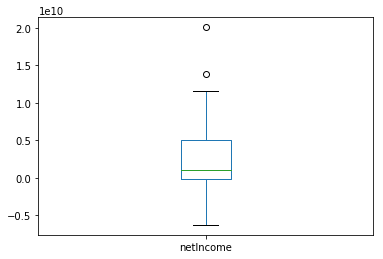

In [75]:
#Create box plot to look for outliers in Net Income
bp(fin_df, "netIncome", "box")

There appear to be a couple outliers when it comes to Net Income. These two outliers are both from Apple which is the first company to reach a $1 trillion market cap. These outliers are real numbers and just show what a juggernaut Apple is. We will leave them in the dataset. 

### Visualizing Data

Now that the data is clean, we can move on to analyzing and visualizing the data. The first thing that I would like to do is look for correlation between the variables. 

In [69]:
#Look for correlation in the data
fin_df.corr()

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalRevenue
cashChange,1.000000,0.306913,0.284715,0.181026,0.377692,0.338171,0.259098,0.187513,0.142311,0.066886,0.300756,0.301036,0.118026,0.140586,0.226134,0.143515,0.252303,0.293775
cashFlow,0.306913,1.000000,0.685143,0.849121,0.772662,0.812321,0.940585,0.827280,0.713891,0.016046,0.944609,0.827464,0.605668,0.835664,0.917111,0.758852,0.880422,0.831968
costOfRevenue,0.284715,0.685143,1.000000,0.529225,0.845798,0.892052,0.737857,0.568368,0.721914,-0.022476,0.620211,0.966592,0.776474,0.471078,0.720086,0.359013,0.853743,0.963939
currentAssets,0.181026,0.849121,0.529225,1.000000,0.665732,0.722186,0.925065,0.605869,0.842842,0.063783,0.824010,0.712092,0.693847,0.863581,0.925169,0.977727,0.855984,0.720913
currentCash,0.377692,0.772662,0.845798,0.665732,1.000000,0.887782,0.831118,0.709135,0.710202,0.022130,0.775430,0.898295,0.692822,0.669013,0.844792,0.535861,0.845081,0.896930
currentDebt,0.338171,0.812321,0.892052,0.722186,0.887782,1.000000,0.833925,0.643316,0.653057,-0.177973,0.862821,0.895727,0.659293,0.772624,0.903582,0.594891,0.940301,0.895450
grossProfit,0.259098,0.940585,0.737857,0.925065,0.831118,0.833925,1.000000,0.753008,0.863350,0.060163,0.926403,0.884050,0.769279,0.886498,0.958109,0.843099,0.906983,0.890871
netIncome,0.187513,0.827280,0.568368,0.605869,0.709135,0.643316,0.753008,1.000000,0.449559,0.210750,0.847238,0.684875,0.385971,0.665105,0.762533,0.497008,0.719776,0.679418
operatingExpense,0.142311,0.713891,0.721914,0.842842,0.710202,0.653057,0.863350,0.449559,1.000000,0.001797,0.609809,0.816787,0.967799,0.758997,0.782720,0.794512,0.778339,0.826263
operatingGainsLosses,0.066886,0.016046,-0.022476,0.063783,0.022130,-0.177973,0.060163,0.210750,0.001797,1.000000,0.123735,0.008671,-0.029978,-0.129941,0.044053,0.029498,0.175642,0.008668


There's quite a bit to unpack here, but one of the interesting things that I found in this correlation matrix is that there appears to be a strong correlation between Total Debt and Gross Profit, which I wouldn't have expected. I'd like to explore that further by looking at a linear regression. 

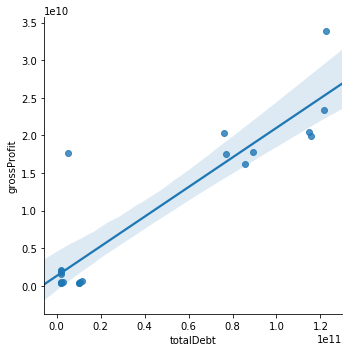

In [76]:
#Create a linear regression
sns.lmplot(x="totalDebt", y="grossProfit", data=fin_df)

The above chart has added a regression line to our data so we can see the trend. Although our dataset is relatively small, it looks like there is indeed a positive correlation between Total Debt and Gross Profit. This may be something I'd like to look into later as I don't quite understand why there would be a correlation between these two variables. 

Now I'd like to get a more visual representation of the correlation between the variables. I'll do this by creating a heat map. This will be helpful as the heat map colors the matrix to make it easier to see high and low values.

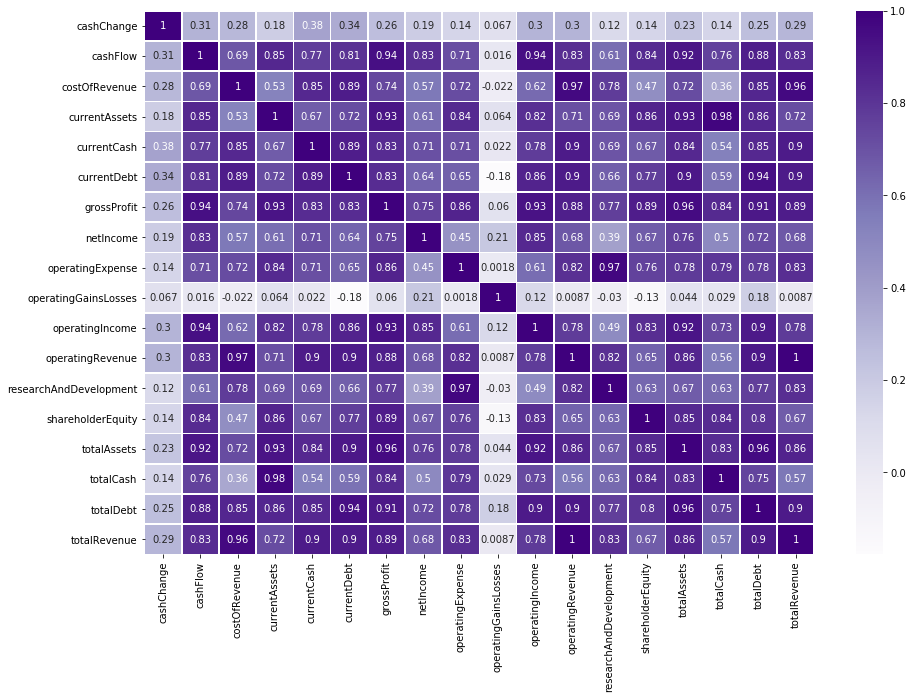

In [82]:
#Create heat map
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(fin_df.corr(), annot =True, linewidths=.5, ax=ax, cmap="Purples")

The heat map has made it a lot easier to see high and low correlation in the dataset. The darker the color, the higher the correlation. 